🔄 Loading and preprocessing data...
   📊 Loaded 225745 samples with 79 features
   🔍 Dataset shape: (225745, 79)
   🔍 Cleaned columns: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN F

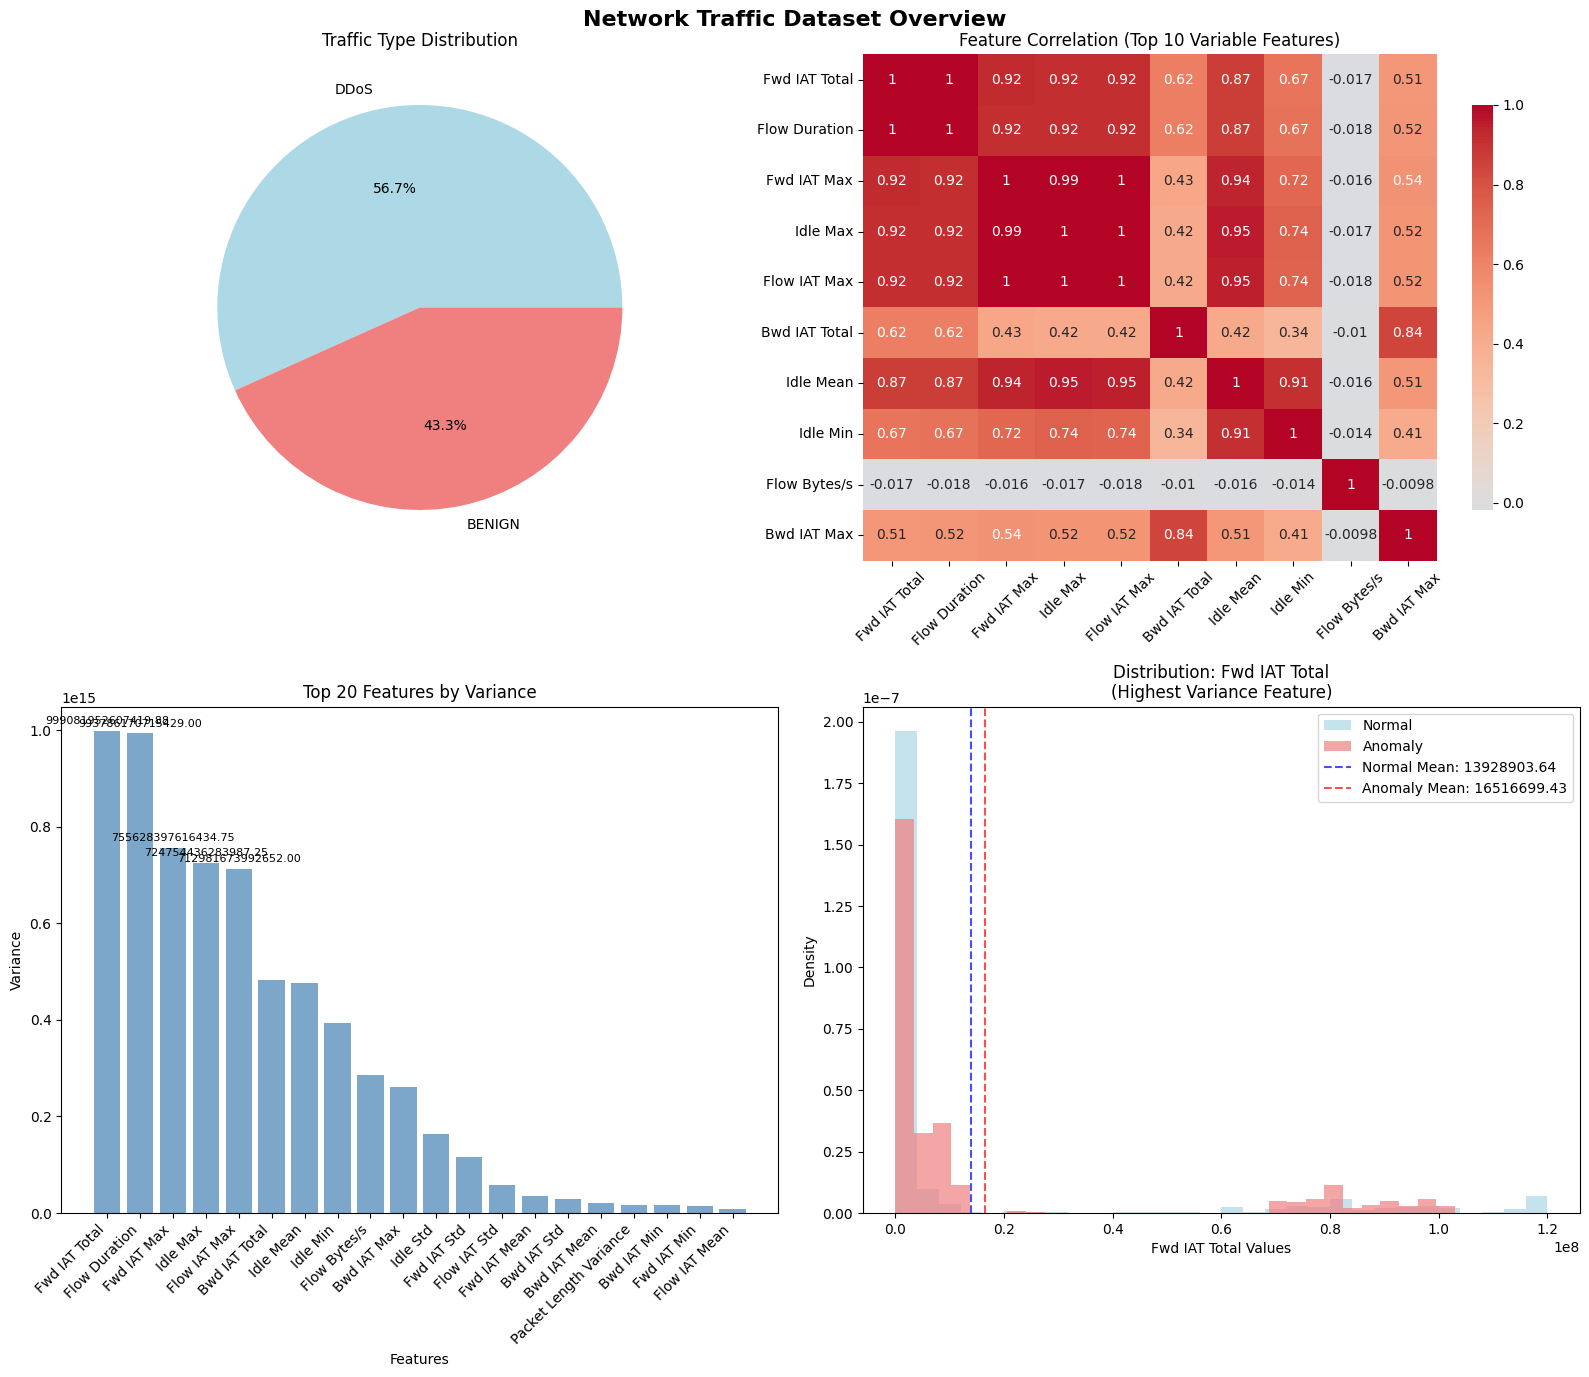


📋 Dataset Feature Summary:
   • Total features: 78
   • Top variance feature: Fwd IAT Total (variance: 999081952607419.8750)
   • Features with zero variance: 10
   • Features in correlation heatmap: Fwd IAT Total, Flow Duration, Fwd IAT Max, Idle Max, Flow IAT Max...

🚀 Running individual algorithms...
🌳 Running Isolation Forest...
   ✅ Isolation Forest completed!
📍 Running Local Outlier Factor...
   ✅ Local Outlier Factor completed!
🔄 Running K-means Anomaly Detection...
   🎯 Using 2 clusters (user-specified)
   ✅ K-means completed! Found 2 clusters
🎯 Running One-Class SVM...
   🔧 Applying PCA for dimensionality reduction...
   📉 Reduced from 78 to 39 features
   🔧 Sampling data for faster training...
   📉 Using 1000 samples for training
   🔧 Using linear kernel for speed...
   🏋️ Training SVM with 1000 samples...
   🔮 Predicting on full dataset...
   ✅ One-Class SVM completed!
🔍 Running DBSCAN...
   ✅ DBSCAN completed! Found 254 clusters

🔄 Running K-means variants...
🔄 Running K-m

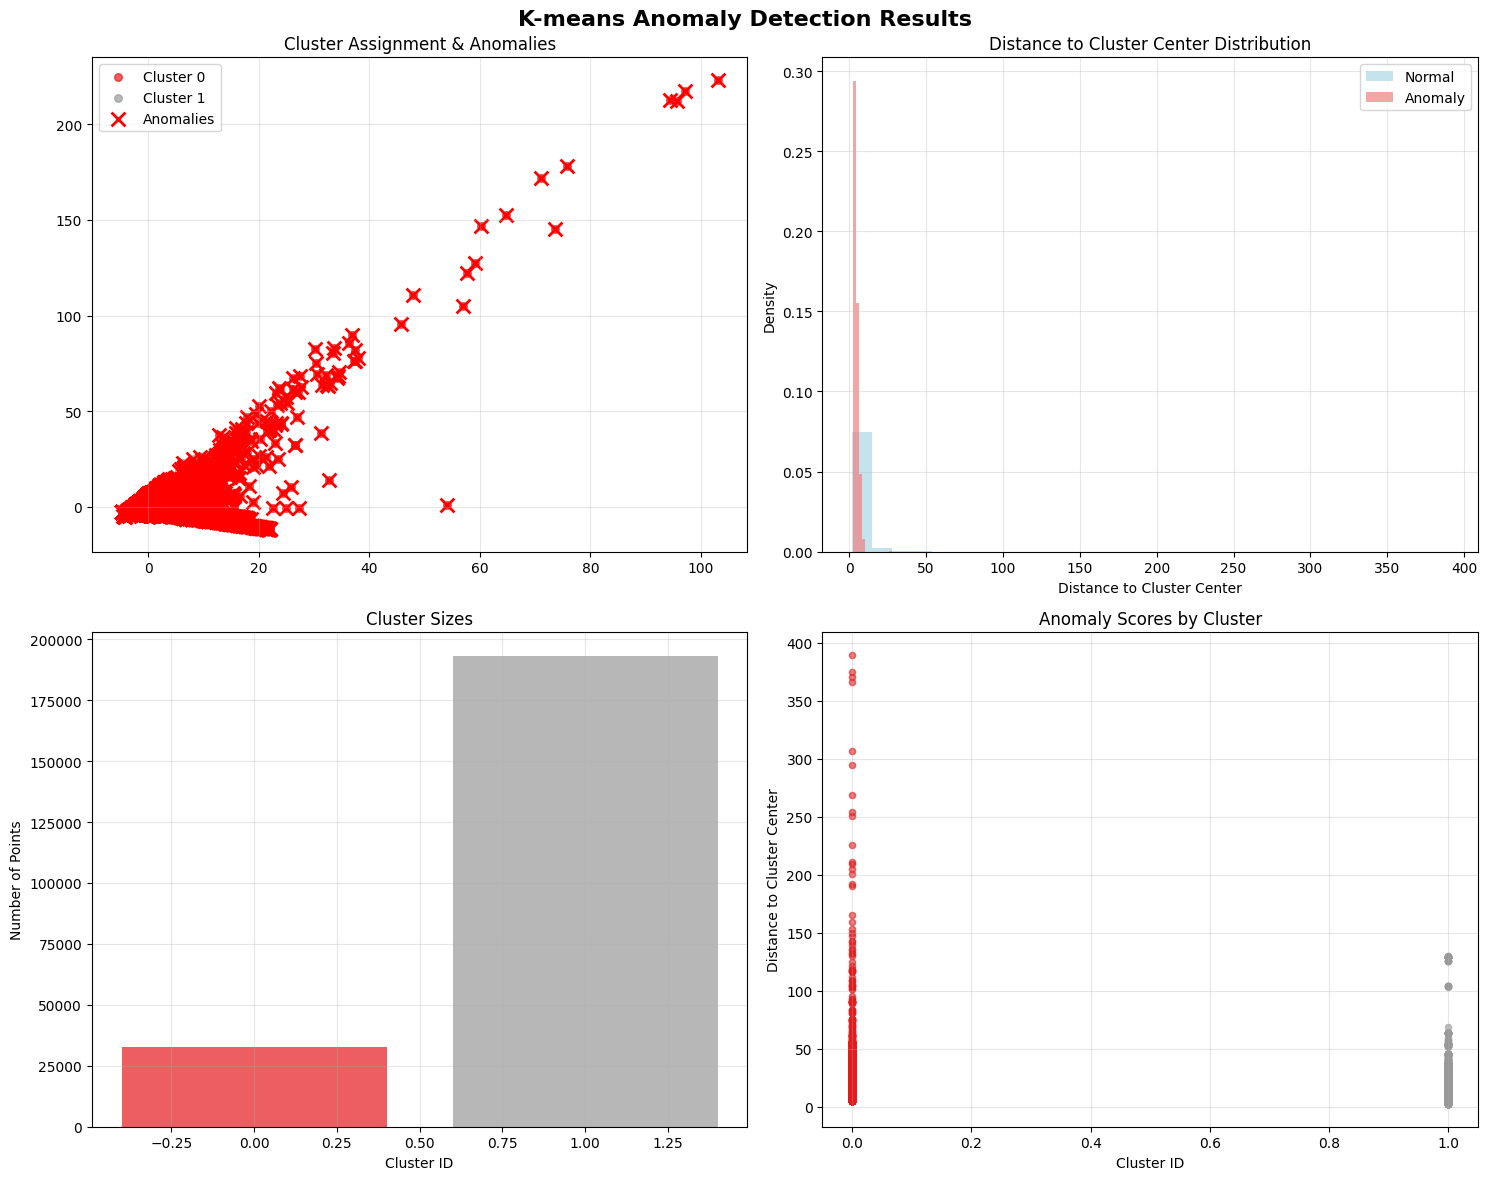

🔍 Calculating metrics for cluster optimization plot...


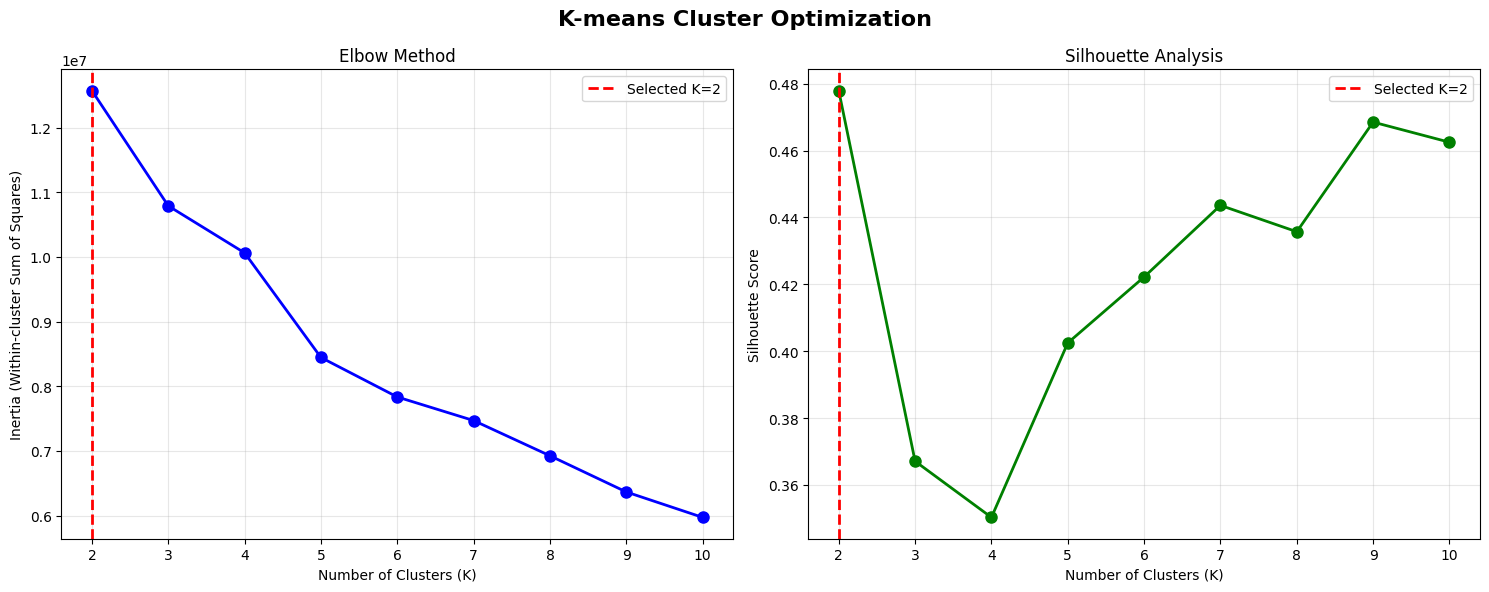


⚡ Running all algorithms in fast mode...
🚀 Running all algorithms in FAST MODE...

🌳 Running Isolation Forest...
   ✅ Isolation Forest completed!
📍 Running Local Outlier Factor...
   ✅ Local Outlier Factor completed!
🔄 Running K-means Anomaly Detection...
   🎯 Using 2 clusters (user-specified)
   ✅ K-means completed! Found 2 clusters
🎯 Running One-Class SVM...
   🔧 Applying PCA for dimensionality reduction...
   📉 Reduced from 78 to 39 features
   🔧 Sampling data for faster training...
   📉 Using 1000 samples for training
   🔧 Using linear kernel for speed...
   🏋️ Training SVM with 1000 samples...
   🔮 Predicting on full dataset...
   ✅ One-Class SVM completed!
⚡ Running Fast SVM Alternatives...
   🔮 Running Elliptic Envelope...
   🚀 Running Nystroem One-Class SVM...
   ✅ Fast alternatives completed!

✅ All algorithms completed!


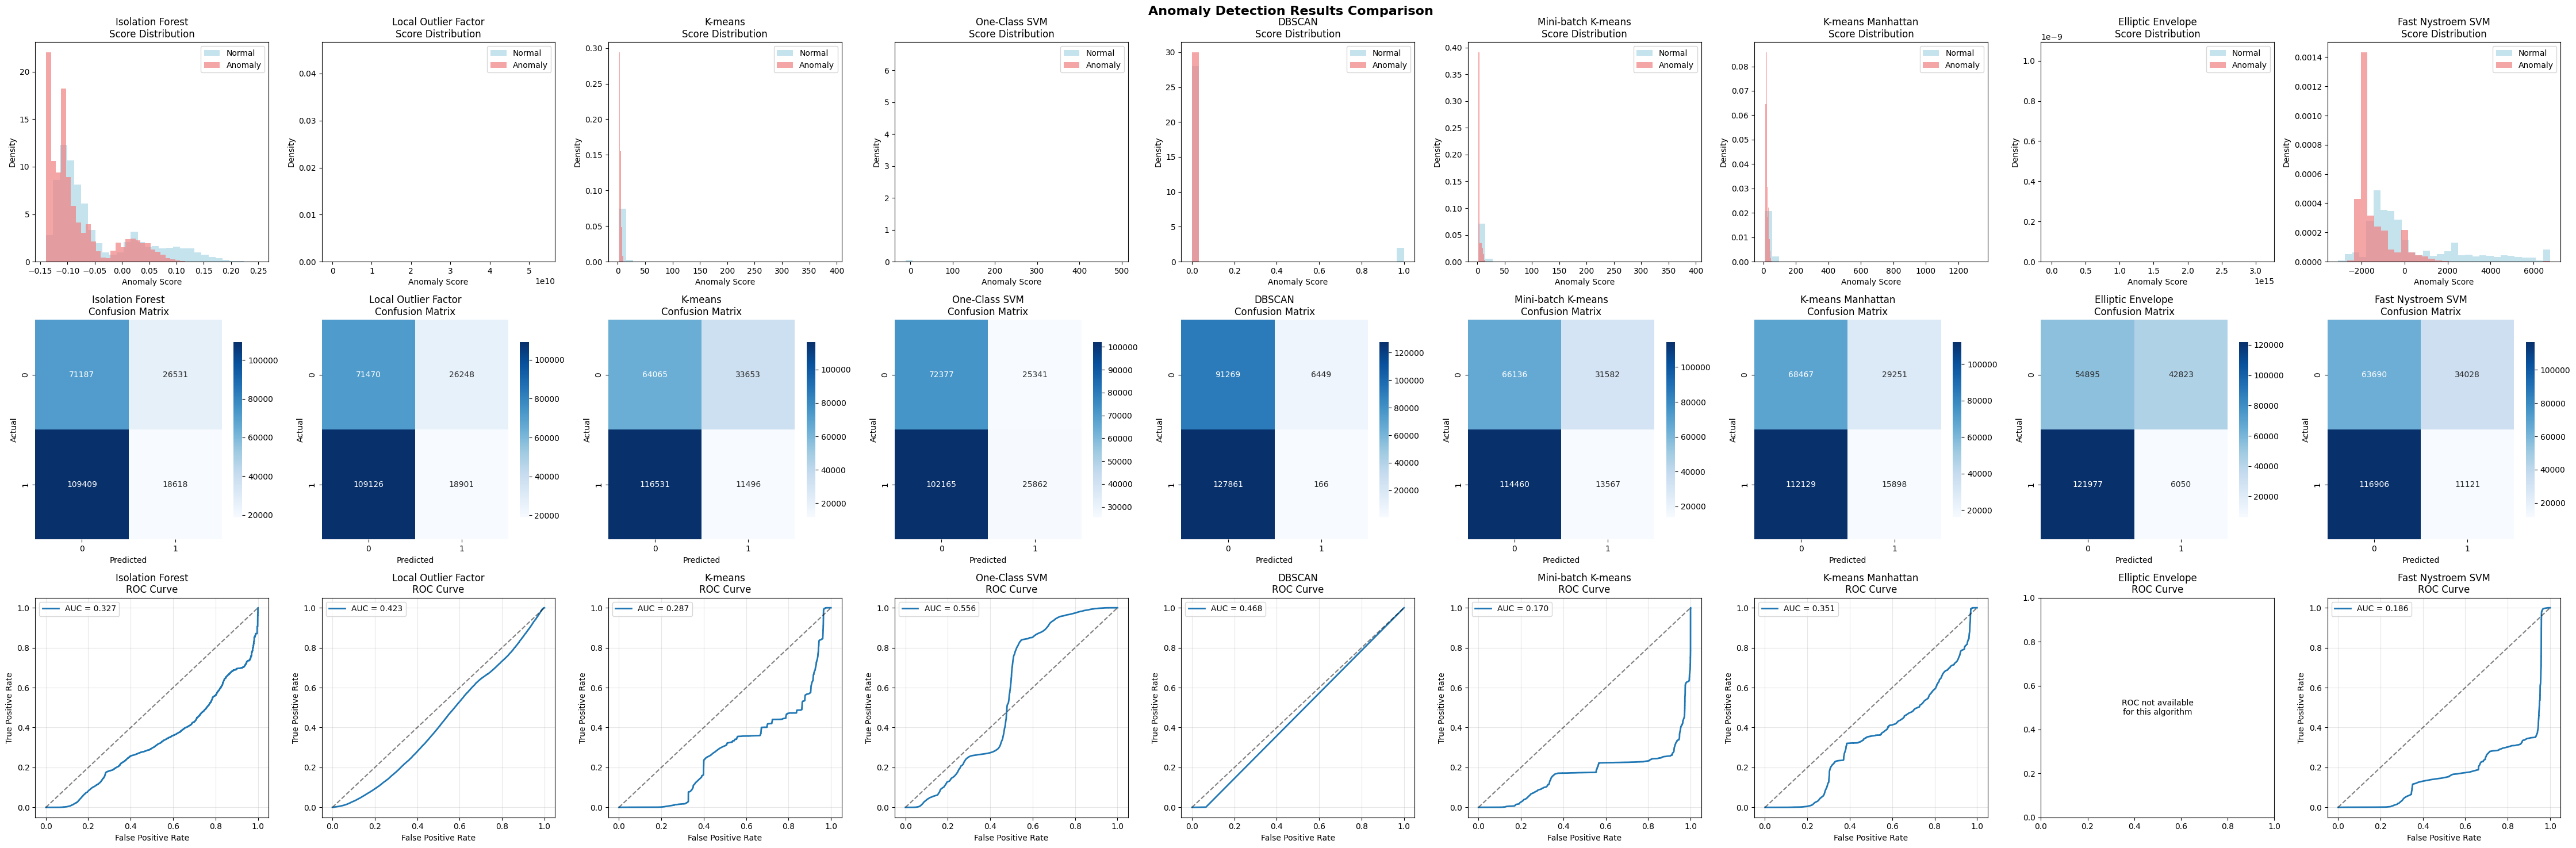

📈 Creating 2D projection using PCA...


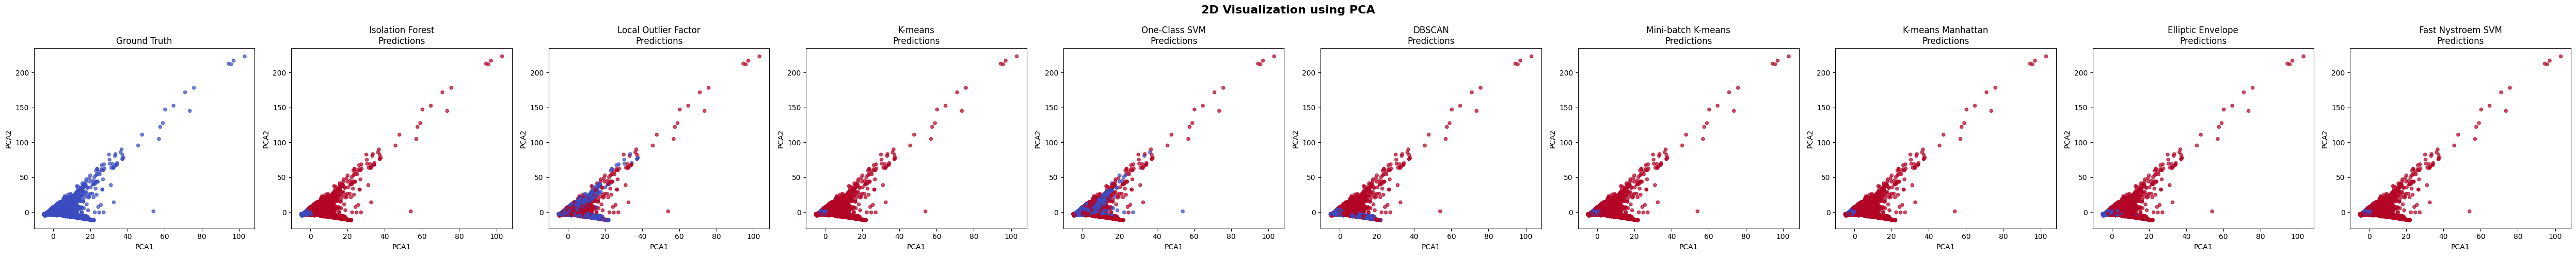


🔒 NETWORK INTRUSION ANOMALY DETECTION REPORT

📊 DATASET SUMMARY
   • Total samples: 225745
   • Features: 78
   • Normal traffic: 97718 (43.3%)
   • Attack traffic: 128027 (56.7%)

🎯 ALGORITHM PERFORMANCE

📊 Algorithm Performance Comparison
                      Precision  Recall  F1-Score  Accuracy    AUC
Algorithm                                                         
Isolation Forest          0.412   0.145     0.215     0.398  0.327
Local Outlier Factor      0.419   0.148     0.218     0.400  0.423
K-means                   0.255   0.090     0.133     0.335  0.287
One-Class SVM             0.505   0.202     0.289     0.435  0.556
DBSCAN                    0.025   0.001     0.002     0.405  0.468
Mini-batch K-means        0.300   0.106     0.157     0.353  0.170
K-means Manhattan         0.352   0.124     0.184     0.374  0.351
Elliptic Envelope         0.124   0.047     0.068     0.270    NaN
Fast Nystroem SVM         0.246   0.087     0.128     0.331  0.186


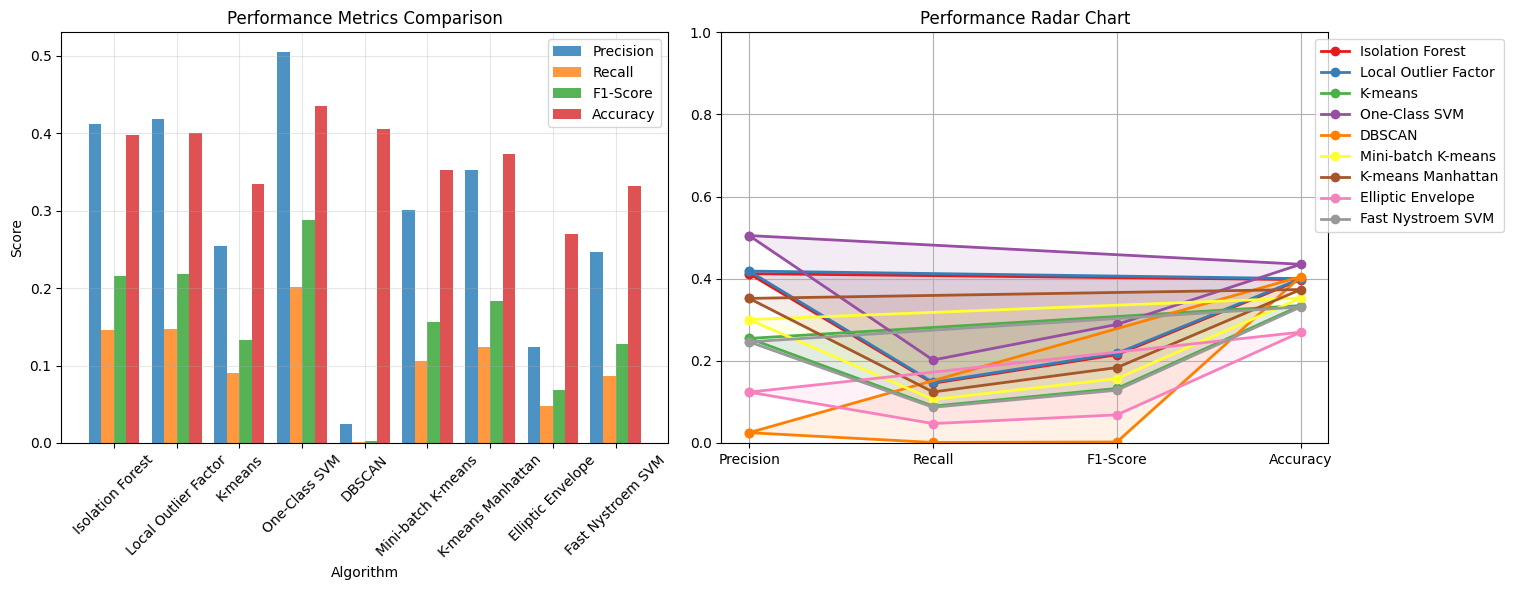


🏆 KEY FINDINGS
   • Best F1-Score: One-Class SVM (0.289)
   • Best AUC: One-Class SVM (0.556)

💡 RECOMMENDATIONS
   • Consider ensemble methods or feature engineering to improve performance
   • For production deployment, consider computational efficiency vs. accuracy trade-offs
   • Regular model retraining recommended as network patterns evolve


✅ Analysis complete! Check the generated plots and metrics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import resample
from scipy.spatial.distance import cdist
from sklearn.covariance import EllipticEnvelope
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from math import pi
import warnings
warnings.filterwarnings('ignore')
input_file_path = '/Users/sfsmith/AICS/Security Logs/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv' 
#'/Users/sfsmith/AICS/Security Logs/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv' 
#'/Users/sfsmith/AICS/Security Logs/AICS network attacks for anomaly detection tester.csv' #your filepath here
method = 'PCA' # 'tSNE' method for 2d visualization, either 'PCA' or 'tSNE'
fast_mode = True #set to True for fast mode for bigger samples
include_variants = False #set to True for Kmeans variants
#hyperparameter tuning
set_n_cluster=2 #n_clusters for kmeans anomaly detection can be numeric or 'auto' using 2 based on elbow score and Silhouette
set_epsilon=1 #epsilon is used by DBSCAN to determine the max distance between point to be considered neighbors, started at 2
set_min_samples=10 #min_samples is used by dbscan to determine how many neigbors are within the eps distance to form a cluster
set_contamination=.2 #contamination rate set for expected anomalies


class NetworkAnomalyDetector:
    """
    Comprehensive anomaly detection system for network intrusion data
    using multiple unsupervised machine learning algorithms.
    """
    
    def __init__(self, data_path):
        """Initialize the detector with data path."""
        self.data_path = data_path
        self.df = None
        self.X = None
        self.y_true = None
        self.label_col = None  # Store the label column name
        self.scaler = StandardScaler()
        self.results = {}
        
    def load_and_preprocess_data(self):
        """Load and preprocess the network traffic data."""
        print("🔄 Loading and preprocessing data...")
        
        # Load data with proper handling of line endings
        self.df = pd.read_csv(self.data_path)
        
        # Clean column names - remove whitespace and carriage returns
        self.df.columns = self.df.columns.str.strip().str.replace('\r', '').str.replace('\n', '')
        
        print(f"   📊 Loaded {len(self.df)} samples with {len(self.df.columns)} features")
        
        # Debug: Check data structure
        print(f"   🔍 Dataset shape: {self.df.shape}")
        print(f"   🔍 Cleaned columns: {list(self.df.columns)}")
        print(f"   🔍 Label column exists: {'Label' in self.df.columns}")
        
        # Check if 'Label' column exists, if not try common variations
        label_col = None
        possible_label_cols = ['Label', 'label', 'class', 'Class', 'target', 'Target']
        for col in possible_label_cols:
            if col in self.df.columns:
                label_col = col
                break
        
        if label_col is None:
            print(f"   ⚠️  No label column found. Available columns: {list(self.df.columns)}")
            print(f"   ⚠️  Using last column: {self.df.columns[-1]}")
            label_col = self.df.columns[-1]
        
        print(f"   🏷️  Using '{label_col}' as label column")
        self.label_col = label_col  # Store for later use
        
        # Show unique labels before processing
        unique_labels = self.df[label_col].unique()
        print(f"   🏷️  Unique labels found: {unique_labels}")
        
        # Separate features and labels BEFORE any processing
        feature_cols = [col for col in self.df.columns if col != label_col]
        print(f"   📊 Feature columns: {len(feature_cols)} (excluding '{label_col}')")
        
        # Extract features (numeric columns only)
        self.X = self.df[feature_cols].copy()
        
        # Convert all feature columns to numeric, replacing non-numeric with NaN
        for col in self.X.columns:
            self.X[col] = pd.to_numeric(self.X[col], errors='coerce')
        
        # Handle missing values
        missing_before = self.X.isnull().sum().sum()
        if missing_before > 0:
            print(f"   🔧 Handling {missing_before} missing values...")
            # Fill with median for each column
            self.X = self.X.fillna(self.X.median())
        
        # Handle infinite values
        inf_count = np.isinf(self.X.values).sum()
        if inf_count > 0:
            print(f"   🔧 Handling {inf_count} infinite values...")
            self.X = self.X.replace([np.inf, -np.inf], np.nan)
            self.X = self.X.fillna(self.X.median())
        
        # Create binary labels (1 for anomaly, 0 for normal)
        def convert_to_binary(label):
            if pd.isna(label):
                return 0  # Default to normal if missing
            normalized = str(label).lower().strip()
            # Consider variations of normal traffic labels
            normal_labels = ['benign', 'normal', 'legitimate', 'clean']
            return 0 if normalized in normal_labels else 1
        
        self.y_true = self.df[label_col].apply(convert_to_binary)
        
        # Debug: Show label conversion
        label_mapping = self.df[label_col].value_counts()
        binary_mapping = self.y_true.value_counts()
        print(f"   🏷️  Original labels: {dict(label_mapping)}")
        print(f"   🏷️  Binary labels: Normal(0): {binary_mapping.get(0, 0)}, Anomaly(1): {binary_mapping.get(1, 0)}")
        
        # Final validation
        print(f"   📊 Final feature matrix shape: {self.X.shape}")
        print(f"   📊 Feature data types: {self.X.dtypes.value_counts().to_dict()}")
        
        # Check for any remaining non-numeric data
        non_numeric = self.X.select_dtypes(exclude=[np.number]).columns
        if len(non_numeric) > 0:
            print(f"   ⚠️  Non-numeric columns found: {list(non_numeric)}")
            # Convert or drop non-numeric columns
            for col in non_numeric:
                self.X[col] = pd.to_numeric(self.X[col], errors='coerce')
            self.X = self.X.fillna(self.X.median())
        
        # Standardize features
        print("   🔧 Standardizing features...")
        self.X_scaled = self.scaler.fit_transform(self.X)
        
        print(f"   ✅ Preprocessing complete!")
        print(f"   📈 Final dataset: {len(self.X)} samples, {len(self.X.columns)} features")
        print(f"   📈 Normal samples: {sum(self.y_true == 0)} ({sum(self.y_true == 0)/len(self.y_true)*100:.1f}%)")
        print(f"   🚨 Anomaly samples: {sum(self.y_true == 1)} ({sum(self.y_true == 1)/len(self.y_true)*100:.1f}%)")
        
   
    #new visualization
    def plot_data_overview(self):
        """Create visualizations of the dataset overview with feature names included."""
        if self.label_col is None:
            print("❌ No label column detected. Cannot create overview plots.")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 14))
        fig.suptitle('Network Traffic Dataset Overview', fontsize=16, fontweight='bold')
    
        # Label distribution
        label_counts = self.df[self.label_col].value_counts()
        axes[0, 0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
                       colors=['lightblue', 'lightcoral'])
        axes[0, 0].set_title('Traffic Type Distribution')
    
        # Feature correlation heatmap (top 10 features)
        top_features = self.X.var().nlargest(10).index
        corr_matrix = self.X[top_features].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                    ax=axes[0, 1], cbar_kws={'shrink': 0.8})
        axes[0, 1].set_title('Feature Correlation (Top 10 Variable Features)')
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].tick_params(axis='y', rotation=0)
    
        # Feature variance distribution with feature names
        feature_vars = self.X.var().sort_values(ascending=False)
        top_20_vars = feature_vars.head(20)
    
        # Create bar plot with feature names
        x_positions = range(len(top_20_vars))
        bars = axes[1, 0].bar(x_positions, top_20_vars.values, color='steelblue', alpha=0.7)
        axes[1, 0].set_title('Top 20 Features by Variance')
        axes[1, 0].set_xlabel('Features')
        axes[1, 0].set_ylabel('Variance')
    
        # Set feature names as x-axis labels
        axes[1, 0].set_xticks(x_positions)
        axes[1, 0].set_xticklabels(top_20_vars.index, rotation=45, ha='right')
    
        # Add value labels on top of bars for better readability commenting out for better visual
        """
        for i, (bar, value) in enumerate(zip(bars, top_20_vars.values)):
            if i < 5:  # Only show values for top 5 to avoid clutter
                axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_20_vars.values)*0.01,
                               f'{value:.2f}', ha='center', va='bottom', fontsize=8)
       """
        
        # Sample distribution by key features with enhanced labeling
        # Use the feature with highest variance as it's most informative
        key_feature = feature_vars.index[0]
        normal_data = self.X[self.y_true == 0][key_feature]
        anomaly_data = self.X[self.y_true == 1][key_feature]
    
        axes[1, 1].hist(normal_data, bins=30, alpha=0.7, label='Normal', color='lightblue', density=True)
        axes[1, 1].hist(anomaly_data, bins=30, alpha=0.7, label='Anomaly', color='lightcoral', density=True)
        axes[1, 1].set_title(f'Distribution: {key_feature}\n(Highest Variance Feature)')
        axes[1, 1].set_xlabel(f'{key_feature} Values')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].legend()
    
        # Add summary statistics as text
        normal_mean = normal_data.mean()
        anomaly_mean = anomaly_data.mean()
        axes[1, 1].axvline(normal_mean, color='blue', linestyle='--', alpha=0.7, label=f'Normal Mean: {normal_mean:.2f}')
        axes[1, 1].axvline(anomaly_mean, color='red', linestyle='--', alpha=0.7, label=f'Anomaly Mean: {anomaly_mean:.2f}')

        # Add legend after all elements with labels are created
        axes[1, 1].legend()
    
        plt.tight_layout()
        plt.show()
    
        # Print feature information for reference
        print(f"\n📋 Dataset Feature Summary:")
        print(f"   • Total features: {len(self.X.columns)}")
        print(f"   • Top variance feature: {key_feature} (variance: {feature_vars.iloc[0]:.4f})")
        print(f"   • Features with zero variance: {(self.X.var() == 0).sum()}")
        print(f"   • Features in correlation heatmap: {', '.join(top_features[:5])}...")
        
    def visualize_2d_projection(self, method):
        """Visualize data in 2D using PCA or t-SNE."""
        print(f"📈 Creating 2D projection using {method}...")        
        if method == 'PCA':
            reducer = PCA(n_components=2, random_state=42)
        else:  # t-SNE
            reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(self.X_scaled)//4))
            
        X_2d = reducer.fit_transform(self.X_scaled)
        
        # Create subplots for each algorithm
        n_models = len(self.results) + 1  # +1 for ground truth
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5))
        if n_models == 1:
            axes = [axes]
            
        fig.suptitle(f'2D Visualization using {method}', fontsize=16, fontweight='bold')
        
        # Ground truth
        scatter = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=self.y_true, 
                                 cmap='coolwarm', alpha=0.7, s=20)
        axes[0].set_title('Ground Truth')
        axes[0].set_xlabel(f'{method}1')
        axes[0].set_ylabel(f'{method}2')
        
        # Results for each algorithm
        for i, (model_name, result) in enumerate(self.results.items(), 1):
            y_pred = result['predictions']
            scatter = axes[i].scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, 
                                     cmap='coolwarm', alpha=0.7, s=20)
            axes[i].set_title(f'{model_name}\nPredictions')
            axes[i].set_xlabel(f'{method}1')
            axes[i].set_ylabel(f'{method}2')
        
        plt.tight_layout()
        plt.show()
        
    def run_isolation_forest(self, contamination=set_contamination, n_estimators=100):
        """Run Isolation Forest anomaly detection."""
        print("🌳 Running Isolation Forest...")
        
        model = IsolationForest(
            contamination=contamination,
            n_estimators=n_estimators,
            random_state=42,
            n_jobs=-1
        )
        
        # Fit and predict
        y_pred = model.fit_predict(self.X_scaled)
        y_pred_binary = (y_pred == -1).astype(int)  # Convert to binary (1 for anomaly)
        
        # Get anomaly scores
        scores = model.decision_function(self.X_scaled)
        scores = -scores  # Invert so higher scores = more anomalous
        
        # Store results
        self.results['Isolation Forest'] = {
            'predictions': y_pred_binary,
            'scores': scores,
            'model': model
        }
        
        print("   ✅ Isolation Forest completed!")
        return y_pred_binary, scores
        
    def run_local_outlier_factor(self, n_neighbors=20, contamination=set_contamination):
        """Run Local Outlier Factor anomaly detection."""
        print("📍 Running Local Outlier Factor...")
        
        model = LocalOutlierFactor(
            n_neighbors=min(n_neighbors, len(self.X_scaled) - 1),
            contamination=contamination,
            n_jobs=-1
        )
        
        # Fit and predict
        y_pred = model.fit_predict(self.X_scaled)
        y_pred_binary = (y_pred == -1).astype(int)
        
        # Get anomaly scores
        scores = -model.negative_outlier_factor_
        
        # Store results
        self.results['Local Outlier Factor'] = {
            'predictions': y_pred_binary,
            'scores': scores,
            'model': model
        }
        
        print("   ✅ Local Outlier Factor completed!")
        return y_pred_binary, scores
        
    def run_one_class_svm(self, nu=0.2, kernel='rbf', optimize_speed=True):
        """Run One-Class SVM anomaly detection with speed optimizations."""
        print("🎯 Running One-Class SVM...")
        
        if optimize_speed:
            # Speed optimization strategies
            X_train = self.X_scaled.copy()
            
            # 1. Feature reduction using PCA if many features
            if X_train.shape[1] > 50:
                print("   🔧 Applying PCA for dimensionality reduction...")
                #from sklearn.decomposition import PCA
                pca = PCA(n_components=min(50, X_train.shape[1]//2), random_state=42)
                X_train = pca.fit_transform(X_train)
                print(f"   📉 Reduced from {self.X_scaled.shape[1]} to {X_train.shape[1]} features")
            
            # 2. Sample reduction for very large datasets
            if len(X_train) > 1000:
                print("   🔧 Sampling data for faster training...")
                #from sklearn.utils import resample
                sample_size = min(1000, len(X_train))
                X_sample_idx = resample(range(len(X_train)), n_samples=sample_size, random_state=42)
                X_sample = X_train[X_sample_idx]
                print(f"   📉 Using {sample_size} samples for training")
            else:
                X_sample = X_train
                X_sample_idx = range(len(X_train))
            
            # 3. Use linear kernel for speed (or RBF with optimized gamma)
            if kernel == 'rbf' and len(X_sample) > 500:
                print("   🔧 Using linear kernel for speed...")
                kernel = 'linear'
            
            # 4. Optimize gamma for RBF kernel
            if kernel == 'rbf':
                gamma = 1.0 / (X_sample.shape[1] * X_sample.var())
                model = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma, cache_size=500)
            else:
                model = OneClassSVM(nu=nu, kernel=kernel, cache_size=500)
            
            # Train on sample
            print(f"   🏋️ Training SVM with {len(X_sample)} samples...")
            model.fit(X_sample)
            
            # Predict on full dataset
            print(f"   🔮 Predicting on full dataset...")
            y_pred = model.predict(X_train)
            scores = -model.decision_function(X_train)
            
        else:
            # Standard implementation
            model = OneClassSVM(nu=nu, kernel=kernel, gamma='scale')
            y_pred = model.fit_predict(self.X_scaled)
            scores = -model.decision_function(self.X_scaled)
            X_train = self.X_scaled
        
        y_pred_binary = (y_pred == -1).astype(int)
        
        # Store results
        self.results['One-Class SVM'] = {
            'predictions': y_pred_binary,
            'scores': scores,
            'model': model
        }
        
        print("   ✅ One-Class SVM completed!")
        return y_pred_binary, scores
    
    def run_kmeans_anomaly_detection(self, n_clusters=set_n_cluster, contamination=set_contamination):
        """Run K-means clustering for anomaly detection."""
        print("🔄 Running K-means Anomaly Detection...")
        
        # Determine optimal number of clusters
        if n_clusters == 'auto':
            n_clusters = self.find_optimal_clusters()
            print(f"   🎯 Using {n_clusters} clusters (auto-detected)")
        else:
            print(f"   🎯 Using {n_clusters} clusters (user-specified)")
        
        # Standard K-means
        #from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(self.X_scaled)
        
        # Calculate anomaly scores based on distance to cluster centers
        scores = []
        for i, point in enumerate(self.X_scaled):
            cluster_center = kmeans.cluster_centers_[cluster_labels[i]]
            distance = np.linalg.norm(point - cluster_center)
            scores.append(distance)
        
        scores = np.array(scores)
        
        # Determine threshold based on contamination rate
        threshold = np.percentile(scores, (1 - contamination) * 100)
        y_pred_binary = (scores > threshold).astype(int)
        
        # Store results
        self.results['K-means'] = {
            'predictions': y_pred_binary,
            'scores': scores,
            'model': kmeans,
            'cluster_labels': cluster_labels,
            'n_clusters': n_clusters
        }
        
        print(f"   ✅ K-means completed! Found {n_clusters} clusters")
        return y_pred_binary, scores
    
    def find_optimal_clusters(self, max_clusters=10):
        """Find optimal number of clusters using elbow method and silhouette analysis."""
        #from sklearn.cluster import KMeans
        #from sklearn.metrics import silhouette_score
        
        # Limit max clusters based on data size
        max_k = min(max_clusters, len(self.X_scaled) // 10, 20)
        if max_k < 2:
            return 2
        
        inertias = []
        silhouette_scores = []
        K_range = range(2, max_k + 1)
        
        print(f"   🔍 Finding optimal clusters (testing 2-{max_k})...")
        
        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
            cluster_labels = kmeans.fit_predict(self.X_scaled)
            
            inertias.append(kmeans.inertia_)
            
            # Calculate silhouette score
            if len(np.unique(cluster_labels)) > 1:
                sil_score = silhouette_score(self.X_scaled, cluster_labels)
                silhouette_scores.append(sil_score)
            else:
                silhouette_scores.append(-1)
        
        # Find elbow point
        optimal_k_elbow = self.find_elbow_point(K_range, inertias)
        
        # Find best silhouette score
        optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
        
        # Choose the better option (prefer silhouette if reasonable)
        if silhouette_scores[optimal_k_silhouette - 2] > 0.3:  # Good silhouette score
            optimal_k = optimal_k_silhouette
        else:
            optimal_k = optimal_k_elbow
        
        print(f"   📊 Elbow method suggests: {optimal_k_elbow} clusters")
        print(f"   📊 Silhouette analysis suggests: {optimal_k_silhouette} clusters")
        print(f"   🎯 Selected: {optimal_k} clusters")
        
        return optimal_k
    
    def find_elbow_point(self, K_range, inertias):
        """Find elbow point using the rate of change method."""
        if len(inertias) < 3:
            return K_range[0]
        
        # Calculate rate of change
        rates = []
        for i in range(1, len(inertias) - 1):
            rate = (inertias[i-1] - inertias[i]) / (inertias[i] - inertias[i+1])
            rates.append(rate)
        
        # Find the point where rate of change is maximum
        elbow_idx = np.argmax(rates) + 1  # +1 because rates starts from index 1
        return K_range[elbow_idx]
    
    def run_kmeans_variants(self):
        """Run different variants of K-means for comparison."""
        print("🔄 Running K-means Variants...")
        
        # 1. Standard K-means
        self.run_kmeans_anomaly_detection()
        
        # 2. Mini-batch K-means (faster for large datasets)
        if len(self.X_scaled) > 1000:
            print("   🚀 Running Mini-batch K-means...")
            #from sklearn.cluster import MiniBatchKMeans
            
            optimal_k = self.results['K-means']['n_clusters']
            mb_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
            cluster_labels = mb_kmeans.fit_predict(self.X_scaled)
            
            # Calculate scores
            scores = []
            for i, point in enumerate(self.X_scaled):
                cluster_center = mb_kmeans.cluster_centers_[cluster_labels[i]]
                distance = np.linalg.norm(point - cluster_center)
                scores.append(distance)
            
            scores = np.array(scores)
            threshold = np.percentile(scores, 80)  # Top 20% as anomalies
            y_pred_binary = (scores > threshold).astype(int)
            
            self.results['Mini-batch K-means'] = {
                'predictions': y_pred_binary,
                'scores': scores,
                'model': mb_kmeans,
                'cluster_labels': cluster_labels
            }
        
        # 3. K-means++ with different distance metrics
        print("   📏 Running K-means with different distance metrics...")
        #from scipy.spatial.distance import cdist
        
        optimal_k = self.results['K-means']['n_clusters']
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
        cluster_labels = kmeans.fit_predict(self.X_scaled)
        
        # Use Manhattan distance instead of Euclidean
        scores_manhattan = []
        for i, point in enumerate(self.X_scaled):
            cluster_center = kmeans.cluster_centers_[cluster_labels[i]]
            distance = np.sum(np.abs(point - cluster_center))  # Manhattan distance
            scores_manhattan.append(distance)
        
        scores_manhattan = np.array(scores_manhattan)
        threshold = np.percentile(scores_manhattan, 80)
        y_pred_binary = (scores_manhattan > threshold).astype(int)
        
        self.results['K-means Manhattan'] = {
            'predictions': y_pred_binary,
            'scores': scores_manhattan,
            'model': kmeans,
            'cluster_labels': cluster_labels
        }
        
        print("   ✅ K-means variants completed!")
        return True
    
    def run_fast_svm_alternatives(self):
        """Run faster alternatives to One-Class SVM."""
        print("⚡ Running Fast SVM Alternatives...")
        
        # 1. Elliptic Envelope (much faster for Gaussian data)
        print("   🔮 Running Elliptic Envelope...")
        #from sklearn.covariance import EllipticEnvelope
        ee_model = EllipticEnvelope(contamination=set_contamination, random_state=42)
        ee_pred = ee_model.fit_predict(self.X_scaled)
        ee_scores = ee_model.decision_function(self.X_scaled)
        ee_binary = (ee_pred == -1).astype(int)
        
        self.results['Elliptic Envelope'] = {
            'predictions': ee_binary,
            'scores': -ee_scores,  # Invert for consistency
            'model': ee_model
        }
        
        # 2. Fast One-Class SVM with Nystroem approximation
        print("   🚀 Running Nystroem One-Class SVM...")
        #from sklearn.kernel_approximation import Nystroem
        #from sklearn.pipeline import Pipeline
        
        # Approximate RBF kernel
        #original is dangerous: n_components=min(300, len(self.X_scaled)//4), new is n_components=min(100, max(50, len(self.X_scaled)//20))
        nystroem = Nystroem(kernel='rbf', n_components=min(100, max(50, len(self.X_scaled)//20)),  
                           random_state=42)
        svm_linear = OneClassSVM(kernel='linear', nu=0.2)
        
        nystroem_svm = Pipeline([
            ('nystroem', nystroem),
            ('svm', svm_linear)
        ])
        
        nyst_pred = nystroem_svm.fit_predict(self.X_scaled)
        nyst_scores = nystroem_svm.decision_function(self.X_scaled)
        nyst_binary = (nyst_pred == -1).astype(int)
        
        self.results['Fast Nystroem SVM'] = {
            'predictions': nyst_binary,
            'scores': -nyst_scores,
            'model': nystroem_svm
        }
        
        print("   ✅ Fast alternatives completed!")
        return ee_binary, ee_scores, nyst_binary, nyst_scores
        
    def run_dbscan(self, eps=set_epsilon, min_samples=set_min_samples):
        """Run DBSCAN clustering for anomaly detection."""
        print("🔍 Running DBSCAN...")
        
        #model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1) #original function that crashed code
        # New code that hopefully works
        n_jobs = min(4, os.cpu_count()) if len(self.X_scaled) > 10000 else -1
        model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=n_jobs)
        
        # Fit and predict
        clusters = model.fit_predict(self.X_scaled)
        
        # Points in cluster -1 are considered anomalies
        y_pred_binary = (clusters == -1).astype(int)
        scores = y_pred_binary.astype(float)  # Binary scores for DBSCAN
        
        # Store results
        self.results['DBSCAN'] = {
            'predictions': y_pred_binary,
            'scores': scores,
            'model': model,
            'clusters': clusters
        }
        
        print(f"   ✅ DBSCAN completed! Found {len(np.unique(clusters))} clusters")
        return y_pred_binary, scores

        
        
    def evaluate_model(self, y_pred, scores, model_name):
        """Evaluate a single model's performance."""
        #from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
        
        # Calculate metrics
        precision = precision_score(self.y_true, y_pred, zero_division=0)
        recall = recall_score(self.y_true, y_pred, zero_division=0)
        f1 = f1_score(self.y_true, y_pred, zero_division=0)
        accuracy = accuracy_score(self.y_true, y_pred)
        
        # Calculate AUC if possible
        try:
            auc = roc_auc_score(self.y_true, scores)
        except:
            auc = np.nan
            
        metrics = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy,
            'AUC': auc
        }
        
        return metrics
        
    def run_all_algorithms(self, fast_mode, include_variants):
        """Run all anomaly detection algorithms."""
        if fast_mode:
            print("🚀 Running all algorithms in FAST MODE...\n")
        else:
            print("🚀 Running all anomaly detection algorithms...\n")
        
        # Run core algorithms
        self.run_isolation_forest()
        self.run_local_outlier_factor()
        self.run_kmeans_anomaly_detection()  # Add K-means
        
        if fast_mode:
            # Use optimized SVM and alternatives
            self.run_one_class_svm(optimize_speed=True)
            self.run_fast_svm_alternatives() #commenting to debug hyperparameters
        else:
            # Standard SVM
            self.run_one_class_svm(optimize_speed=False)
        
        # self.run_dbscan() #skipping dbscan till we can tune hyperparameters
        
        # Run variants if requested
        if include_variants:
            print("\n🔄 Running algorithm variants...")
            self.run_kmeans_variants()
        
        print("\n✅ All algorithms completed!")
        
    def visualize_results(self):
        """Create comprehensive visualizations of results."""
        if not self.results:
            print("❌ No results to visualize. Run algorithms first!")
            return
            
        n_models = len(self.results)
        fig, axes = plt.subplots(3, n_models, figsize=(5*n_models, 15))
        if n_models == 1:
            axes = axes.reshape(-1, 1)
        
        fig.suptitle('Anomaly Detection Results Comparison', fontsize=16, fontweight='bold')
        
        for i, (model_name, result) in enumerate(self.results.items()):
            y_pred = result['predictions']
            scores = result['scores']
            
            # Row 1: Anomaly score distribution
            normal_scores = scores[self.y_true == 0]
            anomaly_scores = scores[self.y_true == 1]
            
            axes[0, i].hist(normal_scores, bins=30, alpha=0.7, label='Normal', 
                           color='lightblue', density=True)
            axes[0, i].hist(anomaly_scores, bins=30, alpha=0.7, label='Anomaly', 
                           color='lightcoral', density=True)
            axes[0, i].set_title(f'{model_name}\nScore Distribution')
            axes[0, i].legend()
            axes[0, i].set_xlabel('Anomaly Score')
            axes[0, i].set_ylabel('Density')
            
            # Row 2: Confusion Matrix
            cm = confusion_matrix(self.y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, i],
                       cbar_kws={'shrink': 0.8})
            axes[1, i].set_title(f'{model_name}\nConfusion Matrix')
            axes[1, i].set_xlabel('Predicted')
            axes[1, i].set_ylabel('Actual')
            
            # Row 3: ROC Curve (if applicable)
            try:
                fpr, tpr, _ = roc_curve(self.y_true, scores)
                auc = roc_auc_score(self.y_true, scores)
                axes[2, i].plot(fpr, tpr, linewidth=2, label=f'AUC = {auc:.3f}')
                axes[2, i].plot([0, 1], [0, 1], 'k--', alpha=0.5)
                axes[2, i].set_title(f'{model_name}\nROC Curve')
                axes[2, i].set_xlabel('False Positive Rate')
                axes[2, i].set_ylabel('True Positive Rate')
                axes[2, i].legend()
                axes[2, i].grid(True, alpha=0.3)
            except:
                axes[2, i].text(0.5, 0.5, 'ROC not available\nfor this algorithm', 
                               ha='center', va='center', transform=axes[2, i].transAxes)
                axes[2, i].set_title(f'{model_name}\nROC Curve')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_kmeans_results(self):
        """Create specific visualizations for K-means results."""
        if 'K-means' not in self.results:
            print("❌ K-means results not found. Run K-means first!")
            return
            
        kmeans_result = self.results['K-means']
        cluster_labels = kmeans_result['cluster_labels']
        scores = kmeans_result['scores']
        predictions = kmeans_result['predictions']
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('K-means Anomaly Detection Results', fontsize=16, fontweight='bold')
        
        # 1. Cluster visualization (2D projection)
        if self.X_scaled.shape[1] > 2:
            #from sklearn.decomposition import PCA
            pca = PCA(n_components=2, random_state=42)
            X_2d = pca.fit_transform(self.X_scaled)
        else:
            X_2d = self.X_scaled[:, :2]
            
        # Plot clusters
        unique_clusters = np.unique(cluster_labels)
        colors = plt.cm.Set1(np.linspace(0, 1, len(unique_clusters)))
        
        for i, cluster in enumerate(unique_clusters):
            cluster_mask = cluster_labels == cluster
            axes[0, 0].scatter(X_2d[cluster_mask, 0], X_2d[cluster_mask, 1], 
                             c=[colors[i]], label=f'Cluster {cluster}', alpha=0.7, s=30)
        
        # Highlight anomalies
        anomaly_mask = predictions == 1
        axes[0, 0].scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], 
                          c='red', marker='x', s=100, label='Anomalies', linewidth=2)
        
        axes[0, 0].set_title('Cluster Assignment & Anomalies')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Distance to cluster center distribution
        normal_scores = scores[self.y_true == 0]
        anomaly_scores = scores[self.y_true == 1]
        
        axes[0, 1].hist(normal_scores, bins=30, alpha=0.7, label='Normal', 
                       color='lightblue', density=True)
        axes[0, 1].hist(anomaly_scores, bins=30, alpha=0.7, label='Anomaly', 
                       color='lightcoral', density=True)
        axes[0, 1].set_title('Distance to Cluster Center Distribution')
        axes[0, 1].set_xlabel('Distance to Cluster Center')
        axes[0, 1].set_ylabel('Density')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Cluster sizes
        cluster_sizes = [np.sum(cluster_labels == i) for i in unique_clusters]
        axes[1, 0].bar(unique_clusters, cluster_sizes, color=colors, alpha=0.7)
        axes[1, 0].set_title('Cluster Sizes')
        axes[1, 0].set_xlabel('Cluster ID')
        axes[1, 0].set_ylabel('Number of Points')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Anomaly scores by cluster
        for i, cluster in enumerate(unique_clusters):
            cluster_mask = cluster_labels == cluster
            cluster_scores = scores[cluster_mask]
            axes[1, 1].scatter([cluster] * len(cluster_scores), cluster_scores, 
                             c=[colors[i]], alpha=0.6, s=20)
        
        axes[1, 1].set_title('Anomaly Scores by Cluster')
        axes[1, 1].set_xlabel('Cluster ID')
        axes[1, 1].set_ylabel('Distance to Cluster Center')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    def plot_cluster_optimization(self):
        """Plot the cluster optimization process (elbow method)."""
        if 'K-means' not in self.results:
            print("❌ K-means results not found. Run K-means first!")
            return
            
        #from sklearn.cluster import KMeans
        #from sklearn.metrics import silhouette_score
        
        # Recalculate for plotting
        max_k = min(10, len(self.X_scaled) // 10, 20)
        if max_k < 2:
            return
            
        K_range = range(2, max_k + 1)
        inertias = []
        silhouette_scores = []
        
        print("🔍 Calculating metrics for cluster optimization plot...")
        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
            cluster_labels = kmeans.fit_predict(self.X_scaled)
            inertias.append(kmeans.inertia_)
            
            if len(np.unique(cluster_labels)) > 1:
                sil_score = silhouette_score(self.X_scaled, cluster_labels)
                silhouette_scores.append(sil_score)
            else:
                silhouette_scores.append(-1)
        
        # Plot results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('K-means Cluster Optimization', fontsize=16, fontweight='bold')
        
        # Elbow method
        ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
        optimal_k = self.results['K-means']['n_clusters']
        ax1.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, 
                   label=f'Selected K={optimal_k}')
        ax1.set_title('Elbow Method')
        ax1.set_xlabel('Number of Clusters (K)')
        ax1.set_ylabel('Inertia (Within-cluster Sum of Squares)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Silhouette analysis
        ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
        ax2.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, 
                   label=f'Selected K={optimal_k}')
        ax2.set_title('Silhouette Analysis')
        ax2.set_xlabel('Number of Clusters (K)')
        ax2.set_ylabel('Silhouette Score')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        """Visualize data in 2D using PCA or t-SNE.""" #Commenting out because of double 2d projections
        """
        print(f"📈 Creating 2D projection using {method}...")
        
        if method == 'PCA':
            reducer = PCA(n_components=2, random_state=42)
        else:  # t-SNE
            reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(self.X_scaled)//4))
            
        X_2d = reducer.fit_transform(self.X_scaled)
        
        # Create subplots for each algorithm
        n_models = len(self.results) + 1  # +1 for ground truth
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5))
        if n_models == 1:
            axes = [axes]
            
        fig.suptitle(f'2D Visualization using {method}', fontsize=16, fontweight='bold')
        
        # Ground truth
        scatter = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=self.y_true, 
                                 cmap='coolwarm', alpha=0.7, s=20)
        axes[0].set_title('Ground Truth')
        axes[0].set_xlabel(f'{method}1')
        axes[0].set_ylabel(f'{method}2')
        
        # Results for each algorithm
        for i, (model_name, result) in enumerate(self.results.items(), 1):
            y_pred = result['predictions']
            scatter = axes[i].scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, 
                                     cmap='coolwarm', alpha=0.7, s=20)
            axes[i].set_title(f'{model_name}\nPredictions')
            axes[i].set_xlabel(f'{method}1')
            axes[i].set_ylabel(f'{method}2')
        
        plt.tight_layout()
        plt.show()
        """
    def compare_algorithms(self):
        """Compare all algorithms and create performance summary."""
        if not self.results:
            print("❌ No results to compare. Run algorithms first!")
            return
            
        print("\n📊 Algorithm Performance Comparison")
        print("=" * 80)
        
        # Calculate metrics for all models
        comparison_data = []
        for model_name, result in self.results.items():
            metrics = self.evaluate_model(result['predictions'], result['scores'], model_name)
            metrics['Algorithm'] = model_name
            comparison_data.append(metrics)
        
        # Create comparison DataFrame
        df_comparison = pd.DataFrame(comparison_data)
        df_comparison = df_comparison.set_index('Algorithm')
        
        # Display table
        print(df_comparison.round(3))
        
        # Create performance visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar plot of metrics
        metrics_to_plot = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
        df_plot = df_comparison[metrics_to_plot]
        
        x = np.arange(len(df_plot.index))
        width = 0.2
        
        for i, metric in enumerate(metrics_to_plot):
            axes[0].bar(x + i*width, df_plot[metric], width, 
                       label=metric, alpha=0.8)
        
        axes[0].set_xlabel('Algorithm')
        axes[0].set_ylabel('Score')
        axes[0].set_title('Performance Metrics Comparison')
        axes[0].set_xticks(x + width * 1.5)
        axes[0].set_xticklabels(df_plot.index, rotation=45)
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Radar chart
        #from math import pi
        
        categories = metrics_to_plot
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]  # Complete the circle
        
        colors = plt.cm.Set1(np.linspace(0, 1, len(df_plot.index)))
        
        for i, (algorithm, row) in enumerate(df_plot.iterrows()):
            values = row.values.tolist()
            values += values[:1]  # Complete the circle
            
            axes[1].plot(angles, values, 'o-', linewidth=2, 
                        label=algorithm, color=colors[i])
            axes[1].fill(angles, values, alpha=0.1, color=colors[i])
        
        axes[1].set_xticks(angles[:-1])
        axes[1].set_xticklabels(categories)
        axes[1].set_ylim(0, 1)
        axes[1].set_title('Performance Radar Chart')
        axes[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        axes[1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        return df_comparison
        
    def generate_report(self):
        """Generate a comprehensive analysis report."""
        if not self.results:
            print("❌ No results available. Run algorithms first!")
            return
            
        print("\n" + "="*80)
        print("🔒 NETWORK INTRUSION ANOMALY DETECTION REPORT")
        print("="*80)
        
        print(f"\n📊 DATASET SUMMARY")
        print(f"   • Total samples: {len(self.X)}")
        print(f"   • Features: {len(self.X.columns)}")
        print(f"   • Normal traffic: {sum(self.y_true == 0)} ({sum(self.y_true == 0)/len(self.y_true)*100:.1f}%)")
        print(f"   • Attack traffic: {sum(self.y_true == 1)} ({sum(self.y_true == 1)/len(self.y_true)*100:.1f}%)")
        
        print(f"\n🎯 ALGORITHM PERFORMANCE")
        df_comparison = self.compare_algorithms()
        
        # Find best performing algorithm
        best_f1 = df_comparison['F1-Score'].idxmax()
        best_auc = df_comparison['AUC'].idxmax() if not df_comparison['AUC'].isna().all() else "N/A"
        
        print(f"\n🏆 KEY FINDINGS")
        print(f"   • Best F1-Score: {best_f1} ({df_comparison.loc[best_f1, 'F1-Score']:.3f})")
        if best_auc != "N/A":
            print(f"   • Best AUC: {best_auc} ({df_comparison.loc[best_auc, 'AUC']:.3f})")
        
        print(f"\n💡 RECOMMENDATIONS")
        if df_comparison.loc[best_f1, 'F1-Score'] > 0.8:
            print(f"   • {best_f1} shows excellent performance for this dataset")
        elif df_comparison.loc[best_f1, 'F1-Score'] > 0.6:
            print(f"   • {best_f1} shows good performance but may need parameter tuning")
        else:
            print(f"   • Consider ensemble methods or feature engineering to improve performance")
            
        print(f"   • For production deployment, consider computational efficiency vs. accuracy trade-offs")
        print(f"   • Regular model retraining recommended as network patterns evolve")
        
        print("\n" + "="*80)

# Usage Example
def main():
    """Main function to demonstrate the anomaly detection system."""
    
    # Initialize detector (update path to your CSV file)
    detector = NetworkAnomalyDetector(input_file_path)
    
    try:
        # Load and preprocess data
        detector.load_and_preprocess_data()
        
        # Quick validation test
        print("\n🔍 Data Validation Test:")
        print(f"   Features shape: {detector.X.shape}")
        print(f"   Features contain only numbers: {detector.X.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all()}")
        print(f"   Labels shape: {detector.y_true.shape}")
        print(f"   Labels are binary: {set(detector.y_true.unique()) <= {0, 1}}")
        
        # Create data overview
        detector.plot_data_overview()
        
        # Run individual algorithms
        print("\n🚀 Running individual algorithms...")
        detector.run_isolation_forest()
        detector.run_local_outlier_factor()
        detector.run_kmeans_anomaly_detection()  # New K-means algorithm
        detector.run_one_class_svm()
        detector.run_dbscan() #commented out till I can get good hyperparameters
        
        # Run K-means variants for comparison
        print("\n🔄 Running K-means variants...")
        detector.run_kmeans_variants()
        
        # Visualize K-means specific results
        detector.visualize_kmeans_results()
        detector.plot_cluster_optimization()
        
        # Run all algorithms in fast mode
        print("\n⚡ Running all algorithms in fast mode...")
        detector.run_all_algorithms(fast_mode, include_variants)
        
        # Visualize results
        detector.visualize_results()
        
        # Create 2D projections
        detector.visualize_2d_projection(method)
        
        # Compare algorithms
        comparison_results = detector.compare_algorithms()
        
        # Generate comprehensive report
        detector.generate_report()
        
        print("\n✅ Analysis complete! Check the generated plots and metrics.")
        
    except FileNotFoundError:
        print("❌ Error: Could not find the data file. Please check the file path.")
        print(f"   Make sure {input_file_path} is in the same directory.")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        print("\n🔍 Debug Information:")
        import traceback
        traceback.print_exc()

"""
def test_data_loading(file_path):
    #Quick test function to check data loading issues.
    print("🧪 Testing data loading...")
    
    try:
        # Read just the first few rows to check structure
        df_test = pd.read_csv(file_path, nrows=5)
        
        # Clean column names like in the main function
        df_test.columns = df_test.columns.str.strip().str.replace('\r', '').str.replace('\n', '')
        
        print(f"   ✅ File loaded successfully")
        print(f"   📊 Shape: {df_test.shape}")
        print(f"   🔍 Raw columns: {list(df_test.columns)}")
        print(f"   🔍 Data types: {df_test.dtypes.to_dict()}")
        
        # Check for label column
        if 'Label' in df_test.columns:
            print(f"   🏷️  Label column found!")
            print(f"   🏷️  Sample labels: {df_test['Label'].tolist()}")
        else:
            print(f"   ⚠️  'Label' column not found after cleaning")
            print(f"   🔍  Available columns: {list(df_test.columns)}")
            print(f"   🏷️  Using last column: {df_test.columns[-1]}")
            print(f"   🏷️  Sample values in last column: {df_test.iloc[:, -1].tolist()}")
            
        print(f"   🔍 Sample data:\n{df_test.head()}")
            
    except Exception as e:
        print(f"   ❌ Error loading file: {e}")
        import traceback
        traceback.print_exc()
        
# Uncomment to test data loading issues:
# test_data_loading(input_file_path)
"""
if __name__ == "__main__":
    main()